In [59]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr


# Scaled * Raw 가 베스트

# 주성분분석

In [15]:
## 144타석
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\전처리')
Saber = pd.read_csv('2019_타자_Saber.csv', encoding = 'cp949')
Saber.index = Saber['Name']
#Saber = Saber[Saber['PA'] >= math.trunc(144 * 3.1)]
Saber = Saber[Saber['PA'] >= 144]
Saber = Saber.iloc[:, -15:]
Saber = Saber.drop('나종덕')
Saber = Saber.drop(columns = ['Money_20'])
Saber

,OBP,SLG,OPS,GPA,SECA,TA,RC,RC27,XR,ISO,PSR,wOBA,BABIP,OW%
Name,,,,,,,,,,,,,,
이정후,0.38596,0.45645,0.84241,0.28780,0.29094,0.80397,95.03027,3.51964,92.56000,0.12021,8.21053,0.53310,0.35150,0.96536
김하성,0.38942,0.49074,0.88016,0.29793,0.47593,0.96154,96.32271,3.56751,104.67000,0.18333,24.11538,0.62520,0.32813,0.96626
정은원,0.31715,0.37411,0.69127,0.23625,0.28191,0.63636,58.53332,2.16790,69.29200,0.11170,10.18182,0.53814,0.30369,0.91360
이천웅,0.37767,0.37363,0.75129,0.26336,0.24359,0.71571,71.92514,2.66389,75.39400,0.06593,3.65217,0.53459,0.35853,0.94106
최정,0.39934,0.51889,0.91823,0.30942,0.47714,0.99171,95.73611,3.54578,107.06400,0.22664,5.43750,0.67752,0.30256,0.96586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이우성,0.28144,0.36424,0.64568,0.21771,0.29139,0.57025,11.04339,0.40901,16.51000,0.14570,0.00000,1.64929,0.25234,0.27347
허일,0.31481,0.30201,0.61683,0.21717,0.16779,0.53097,12.49533,0.46279,14.69600,0.04698,1.33333,1.62984,0.30833,0.32518
김찬형,0.32237,0.35461,0.67698,0.23372,0.16312,0.58879,14.18193,0.52526,15.79200,0.07801,1.50000,1.72412,0.31667,0.38300


In [16]:
scaled_Saber = StandardScaler().fit_transform(Saber)
scaled_Saber = pd.DataFrame(scaled_Saber)
scaled_Saber

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.287552,1.157483,1.285292,1.312646,0.027025,0.999527,2.246215,2.246215,1.815807,0.175190,1.022387,-1.061568,1.313936,0.949822
1,1.377762,1.668187,1.667036,1.631851,2.114815,2.191685,2.301531,2.301533,2.321025,1.431254,4.868988,-0.776247,0.588578,0.953498
2,-0.506480,-0.068863,-0.243098,-0.311738,-0.074887,-0.268593,0.684159,0.684158,0.845087,0.005845,1.499145,-1.045954,-0.169991,0.738396
3,1.071413,-0.076012,0.363849,0.542521,-0.507365,0.331761,1.257324,1.257319,1.099657,-0.904960,-0.080057,-1.056952,1.532134,0.850563
4,1.636399,2.087444,2.052015,1.993911,2.128471,2.419948,2.276424,2.276423,2.420901,2.293106,0.351727,-0.614162,-0.205064,0.951864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-1.437520,-0.215863,-0.704122,-0.895950,0.032104,-0.768774,-1.348393,-1.348398,-1.356931,0.682432,-0.963337,2.396335,-1.763792,-1.876363
101,-0.567489,-1.142697,-0.995865,-0.912966,-1.362841,-1.065963,-1.286250,-1.286251,-1.432610,-1.282058,-0.640870,2.336080,-0.025974,-1.665141
102,-0.370382,-0.359289,-0.387604,-0.391461,-1.415547,-0.628503,-1.214065,-1.214061,-1.386885,-0.664573,-0.600561,2.628154,0.232883,-1.428962
103,-0.936672,-0.214374,-0.508852,-0.622751,1.380325,-0.249451,-1.381383,-1.381379,-1.377624,1.330960,-0.963337,3.025653,-3.247099,-1.989878


In [17]:
pca = PCA(n_components = 3)
PC = pca.fit_transform(scaled_Saber)
principals = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3'])
print('주성분 설명력', pca.explained_variance_ratio_)
print('주성분 설명력 합', sum(pca.explained_variance_ratio_))
print('고유값', pca.explained_variance_)
prins = pd.DataFrame(pca.components_)
prins.columns = Saber.columns
prins.index = ['P1', 'P2', 'P3']
prins

주성분 설명력 [0.69552454 0.13587233 0.07142536]
주성분 설명력 합 0.9028222227430581
고유값 [9.83097182 1.92050308 1.00956998]


,OBP,SLG,OPS,GPA,SECA,TA,RC,RC27,XR,ISO,PSR,wOBA,BABIP,OW%
P1,0.282294,0.292264,0.307932,0.308118,0.237319,0.307376,0.303343,0.303343,0.304820,0.215795,0.158976,-0.205690,0.167517,0.274176
P2,-0.064828,0.235260,0.134588,0.089180,0.432046,0.149760,-0.154915,-0.154915,-0.125019,0.490413,-0.110890,0.441977,-0.342060,-0.276613
P3,-0.339608,-0.061183,-0.173266,-0.217065,0.148564,-0.103540,0.089150,0.089150,0.152582,0.163869,0.608039,-0.288843,-0.495626,0.078588


In [18]:
# os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\주성분')
# prins.to_csv('2019_타자_주성분3개_144타석_scaled_SM.csv', encoding = 'cp949')

In [19]:
player_list = Saber.index
df_fin = pd.DataFrame(index = player_list)

## 주성분계수 * SM 지표

In [22]:
Saber['SECA'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['SECA']] ## 왜 유독 이새끼만 지랄인지 모르겠음
Saber['RC'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['RC']]
Saber['RC27'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['RC27']]
Saber['XR'] = [int(e.replace('.', '').strip()) / 100000 for e in Saber['XR']]

### 주성분 계수 * raw SM 지표

In [23]:
GEN_list = []
POW_list = []
SPD_list = []

for a in range(0, len(Saber)) :
    GEN = 0
    POW = 0
    SPD = 0
    
    for b in range(0, len(Saber.columns)) :
        GEN += Saber.iloc[a, b] * prins.iloc[0, b]
        POW += Saber.iloc[a, b] * prins.iloc[1, b]
        SPD += Saber.iloc[a, b] * prins.iloc[2, b]
    
    GEN_list.append(GEN)
    POW_list.append(POW)
    SPD_list.append(SPD)

### 주성분 계수 * scaled SM 지표

In [24]:
# GEN_list = []
# POW_list = []
# SPD_list = []

# for a in range(0, len(Saber)) :
#     GEN = 0
#     POW = 0
#     SPD = 0
    
#     for b in range(0, len(Saber.columns)) :
#         GEN += scaled_Saber.iloc[a, b] * prins.iloc[0, b]
#         POW += scaled_Saber.iloc[a, b] * prins.iloc[1, b]
#         SPD += scaled_Saber.iloc[a, b] * prins.iloc[2, b]
    
#     GEN_list.append(GEN)
#     POW_list.append(POW)
#     SPD_list.append(SPD)

In [25]:
df_fin = pd.DataFrame(index = Saber.index)
df_fin['P1'] = GEN_list
df_fin['P2'] = POW_list
df_fin['P3'] = SPD_list
df_fin

,P1,P2,P3
Name,,,
이정후,60.560333,-27.374269,27.260961
김하성,67.295856,-30.662813,38.893541
정은원,42.115371,-18.860721,21.633669
이천웅,47.216744,-21.099528,19.750326
최정,64.901770,-28.726298,27.835213
...,...,...,...
이우성,9.012280,-2.814718,2.691278
허일,9.075084,-3.139527,3.308495
김찬형,10.028579,-3.499849,3.684778


# 수비점수

In [26]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리')
df_df = pd.read_csv('2019_전포지션_수비점수_March_kWAR_AHP.csv', encoding = 'cp949')
df_df.index = df_df['선수명']
del df_df['선수명']
df_df

,IP,E,March_score,kWAR_score,AHP_score
선수명,,,,,
강경학,273.00,4.0,1468.641,147.829,39.993
강로한,709.67,20.0,3910.467,449.717,105.735
강민국,245.67,9.0,1487.254,171.306,44.404
강민호,842.00,8.0,6661.904,832.738,308.113
강백호,622.66,3.0,1549.272,127.421,23.109
...,...,...,...,...,...
홍창기,52.00,0.0,136.500,13.400,2.337
황대인,48.00,0.0,100.000,1.200,1.260
황윤호,297.67,6.0,1534.647,177.799,38.623


## 수비점수 추가

In [27]:
## 선수 index 순으로 수비점수 리스트에 넣기
M_list = []
K_list = []
A_list = []
for a in player_list :
    for b, c in enumerate(df_df.index) :
        if a == c :
            M_list.append(df_df.iloc[b, 2])
            K_list.append(df_df.iloc[b, 3])
            A_list.append(df_df.iloc[b, 4])

In [28]:
df_fin['March_score'] = M_list
df_fin['kWAR_score'] = K_list
df_fin['AHP_score'] = A_list
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score
Name,,,,,,
이정후,60.560333,-27.374269,27.260961,2884.098,290.201,50.647
김하성,67.295856,-30.662813,38.893541,6602.337,785.830,206.309
정은원,42.115371,-18.860721,21.633669,7027.212,702.721,145.229
이천웅,47.216744,-21.099528,19.750326,3690.130,420.339,70.483
최정,64.901770,-28.726298,27.835213,4409.072,661.361,136.681
...,...,...,...,...,...,...
이우성,9.012280,-2.814718,2.691278,552.936,56.394,10.041
허일,9.075084,-3.139527,3.308495,465.352,46.765,8.300
김찬형,10.028579,-3.499849,3.684778,2494.480,286.502,77.129


# 연차, 연봉, FA유무 추가

In [29]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\전처리')
df_1 = pd.read_csv('2019_타자_DEA_OPS_144타석_연차_FA.csv', encoding = 'cp949')
df_1.index = df_1['Name']
del df_1['Name']
df_1 = df_1.drop('나종덕')
df_1

,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,...,P_HIT_CN,Position,Money_19,Money_20,OBP,SLG,OPS,연차,프로입단,FA유무
Name,,,,,,,,,,,,,,,,,,,,,
이정후,630,574,68,91,193,31,10,6,13,7,...,42,외,23000,39000,0.385965,0.456446,0.842411,3,2017,0
김하성,625,540,104,112,166,38,2,19,33,4,...,59,내,32000,55000,0.389423,0.490741,0.880164,6,2014,0
정은원,624,564,57,83,148,27,6,8,14,7,...,27,내,5500,12000,0.317152,0.374113,0.691266,2,2018,0
이천웅,613,546,48,88,168,24,3,2,21,10,...,35,외,15000,28000,0.377668,0.373626,0.751295,9,2011,0
최정,606,503,99,86,147,27,0,29,3,2,...,47,내,120000,120000,0.399340,0.518887,0.918227,15,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이우성,168,151,22,19,33,4,0,6,0,0,...,11,외,4000,4000,0.281437,0.364238,0.645676,7,2013,0
허일,162,149,17,14,38,4,0,1,2,1,...,14,외,3000,4100,0.314815,0.302013,0.616828,9,2011,0
김찬형,154,141,12,16,39,4,2,1,3,4,...,5,내,4300,5800,0.322368,0.354610,0.676978,4,2016,0


In [30]:
df_fin['연차'] = df_1['연차']
df_fin['20연봉'] = df_1['Money_20']
df_fin['FA유무'] = df_1['FA유무']
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무
Name,,,,,,,,,
이정후,60.560333,-27.374269,27.260961,2884.098,290.201,50.647,3,39000,0
김하성,67.295856,-30.662813,38.893541,6602.337,785.830,206.309,6,55000,0
정은원,42.115371,-18.860721,21.633669,7027.212,702.721,145.229,2,12000,0
이천웅,47.216744,-21.099528,19.750326,3690.130,420.339,70.483,9,28000,0
최정,64.901770,-28.726298,27.835213,4409.072,661.361,136.681,15,120000,1
...,...,...,...,...,...,...,...,...,...
이우성,9.012280,-2.814718,2.691278,552.936,56.394,10.041,7,4000,0
허일,9.075084,-3.139527,3.308495,465.352,46.765,8.300,9,4100,0
김찬형,10.028579,-3.499849,3.684778,2494.480,286.502,77.129,4,5800,0


In [31]:
# os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리\211117')
# df_fin.to_csv('2019_타자_수비점수(March, kWAR, AHP), 주성분(P1, P2, P3)_SM, 연차, 20연봉, FA.csv', encoding = 'cp949')

# 포, 내, 외 가중치 추가

In [32]:
pos_score = []
for po in range(0, len(df_1)) :
    if df_1['Position'][po] == '내' :
        pos_score.append(1)
    elif df_1['Position'][po] == '외' :
        pos_score.append(0)
    elif df_1['Position'][po] == '포' :
        pos_score.append(2)
df_1['pos_score'] = pos_score
df_1

,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,...,Position,Money_19,Money_20,OBP,SLG,OPS,연차,프로입단,FA유무,pos_score
Name,,,,,,,,,,,,,,,,,,,,,
이정후,630,574,68,91,193,31,10,6,13,7,...,외,23000,39000,0.385965,0.456446,0.842411,3,2017,0,0
김하성,625,540,104,112,166,38,2,19,33,4,...,내,32000,55000,0.389423,0.490741,0.880164,6,2014,0,1
정은원,624,564,57,83,148,27,6,8,14,7,...,내,5500,12000,0.317152,0.374113,0.691266,2,2018,0,1
이천웅,613,546,48,88,168,24,3,2,21,10,...,외,15000,28000,0.377668,0.373626,0.751295,9,2011,0,0
최정,606,503,99,86,147,27,0,29,3,2,...,내,120000,120000,0.399340,0.518887,0.918227,15,2005,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
이우성,168,151,22,19,33,4,0,6,0,0,...,외,4000,4000,0.281437,0.364238,0.645676,7,2013,0,0
허일,162,149,17,14,38,4,0,1,2,1,...,외,3000,4100,0.314815,0.302013,0.616828,9,2011,0,0
김찬형,154,141,12,16,39,4,2,1,3,4,...,내,4300,5800,0.322368,0.354610,0.676978,4,2016,0,1


In [33]:
df_fin['pos_weight'] = pos_score
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight
Name,,,,,,,,,,
이정후,60.560333,-27.374269,27.260961,2884.098,290.201,50.647,3,39000,0,0
김하성,67.295856,-30.662813,38.893541,6602.337,785.830,206.309,6,55000,0,1
정은원,42.115371,-18.860721,21.633669,7027.212,702.721,145.229,2,12000,0,1
이천웅,47.216744,-21.099528,19.750326,3690.130,420.339,70.483,9,28000,0,0
최정,64.901770,-28.726298,27.835213,4409.072,661.361,136.681,15,120000,1,1
...,...,...,...,...,...,...,...,...,...,...
이우성,9.012280,-2.814718,2.691278,552.936,56.394,10.041,7,4000,0,0
허일,9.075084,-3.139527,3.308495,465.352,46.765,8.300,9,4100,0,0
김찬형,10.028579,-3.499849,3.684778,2494.480,286.502,77.129,4,5800,0,1


# 다중회귀분석

In [34]:
df_fin['20연봉'] = np.log(df_fin['20연봉'])
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight
Name,,,,,,,,,,
이정후,60.560333,-27.374269,27.260961,2884.098,290.201,50.647,3,10.571317,0,0
김하성,67.295856,-30.662813,38.893541,6602.337,785.830,206.309,6,10.915088,0,1
정은원,42.115371,-18.860721,21.633669,7027.212,702.721,145.229,2,9.392662,0,1
이천웅,47.216744,-21.099528,19.750326,3690.130,420.339,70.483,9,10.239960,0,0
최정,64.901770,-28.726298,27.835213,4409.072,661.361,136.681,15,11.695247,1,1
...,...,...,...,...,...,...,...,...,...,...
이우성,9.012280,-2.814718,2.691278,552.936,56.394,10.041,7,8.294050,0,0
허일,9.075084,-3.139527,3.308495,465.352,46.765,8.300,9,8.318742,0,0
김찬형,10.028579,-3.499849,3.684778,2494.480,286.502,77.129,4,8.665613,0,1


## 수비점수 kWAR

In [63]:
x = df_fin.drop(['March_score', 'AHP_score', 'pos_weight', '20연봉'], axis = 1)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.3299106  11.01818783  9.66736678 10.36262604 12.34175206 10.93239476
 11.50775875  9.86195377 10.70120277 11.11994143 11.88142481 12.01063304
 11.56455116 10.42496506 10.40651904 10.84500293  9.57667166 10.30403299
 10.69094373 11.36876013 10.98418151 10.4963105  10.10370071  9.44163757
 10.37417181 10.11300116 10.09417926 11.39906796 10.19053486  9.98244955
 11.07866731  9.95927777 11.36666749 11.07854214 10.35011933 10.89307907
 10.36715344 10.73452314  9.95275128 11.21745423  9.65529176 10.10232393
  9.80310647 10.56299216 11.931783   11.04993024  9.74733166 10.34405643
 10.20721412  9.38484672 11.31973489  9.18118394  9.50452789  9.4776538
 11.03124975 10.86930975  9.0697948   9.44503117  9.89016185  9.28535657
  9.55670523 10.11678413 10.42639025  9.28038564 10.8957252   9.47900041
  9.75267918  9.16897435 10.64509427 10.33350614 10.02233919  8.90264652
  9.30261775  9.49265698  9.82605624  9.14588405  8.90446109 10.23601266
  8.97632674  9.04429725  9.15894153  9.03565052  8.

In [43]:
LR.coef_

array([1.62269667e-01, 2.72148413e-01, 6.78268448e-03, 3.26899549e-04,
       8.31191110e-02, 5.52654094e-01])

In [44]:
LR.intercept_

7.4235429798408195

In [45]:
#add constant to predictor variables
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.aic)

138.51525909822664


C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight
Name,,,,,,,,,,
이정후,60.560333,-27.374269,27.260961,2884.098,290.201,50.647,3,10.571317,0,0
김하성,67.295856,-30.662813,38.893541,6602.337,785.830,206.309,6,10.915088,0,1
정은원,42.115371,-18.860721,21.633669,7027.212,702.721,145.229,2,9.392662,0,1
이천웅,47.216744,-21.099528,19.750326,3690.130,420.339,70.483,9,10.239960,0,0
최정,64.901770,-28.726298,27.835213,4409.072,661.361,136.681,15,11.695247,1,1
...,...,...,...,...,...,...,...,...,...,...
이우성,9.012280,-2.814718,2.691278,552.936,56.394,10.041,7,8.294050,0,0
허일,9.075084,-3.139527,3.308495,465.352,46.765,8.300,9,8.318742,0,0
김찬형,10.028579,-3.499849,3.684778,2494.480,286.502,77.129,4,8.665613,0,1


In [66]:
from statsmodels.formula.api import ols
df_fin['salary'] = df_fin['20연봉']
res = ols(formula = 'salary ~ P1 + P2 + P3 + kWAR_score + 연차 + FA유무', data = df_fin).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     71.58
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.30e-33
Time:                        08:10:44   Log-Likelihood:                -62.258
No. Observations:                 105   AIC:                             138.5
Df Residuals:                      98   BIC:                             157.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4235      0.315     23.572      0.000       6.799       8.049
P1             0.1623      0.116      1.394      0.166      -0.069       0.393
P2             0.2721      0.266      1.025      0.308      -0.255       0.799
P3             0.0068      0.029      0.236      0.814      -0.050       0.064
kWAR_score     0.0003      0.000      1.940      0.055   -7.48e-06       0.001
연차             0.0831      0.012      6.828      0.000       0.059       0.107
FA유무           0.5527      0.133      4.158      0.000       0.289       0.816
==============================================================================
Omnibus:                        3.356   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.881
Skew:                           0.398   Prob(JB):                        0.237
Kurtosis:                       3.153   Cond. No.                     4.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 수비점수 March

In [58]:
x = df_fin.drop(['kWAR_score', 'AHP_score', 'pos_weight', '20연봉'], axis = 1)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.32429106 11.01217036  9.71566974 10.35117619 12.29483406 10.91963499
 11.52192528  9.85754959 10.68828248 11.14554686 11.87273297 11.99537977
 11.555684   10.44105889 10.4024604  10.89243913  9.55489499 10.2478709
 10.69681671 11.41201403 11.03886731 10.52142613 10.10931284  9.43104738
 10.377894   10.10323615 10.07142653 11.36293559 10.18422953  9.97654789
 11.0866123   9.96209476 11.36497595 11.1273892  10.34685433 10.85655404
 10.35653293 10.73056382  9.97133214 11.24394781  9.65112636 10.09655914
  9.79315862 10.5491327  11.92760408 11.02052663  9.76154725 10.33614016
 10.21633379  9.38091352 11.29368354  9.19629903  9.52104643  9.51416388
 11.03174057 10.86491616  9.06490489  9.44473038  9.88303902  9.29894449
  9.53777204 10.13848856 10.39592644  9.26771583 10.90233852  9.51465306
  9.74271037  9.19083592 10.67748734 10.34714267 10.00760614  8.89783436
  9.29613827  9.4782571   9.82999045  9.14705956  8.90674791 10.24831131
  8.97087189  9.05591674  9.15068892  9.03652982  8.

In [49]:
#add constant to predictor variables
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.aic)

138.31001661079088


C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## 수비점수 AHP

In [51]:
x = df_fin.drop(['kWAR_score', 'March_score', 'pos_weight', '20연봉'], axis = 1)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.3287999  11.04409188  9.63847949 10.32501481 12.28387837 10.92791366
 11.51418902  9.82878857 10.68408937 11.13437341 11.88914194 11.99766365
 11.57225083 10.43413813 10.39080097 10.82434508  9.55287033 10.26524317
 10.68877702 11.36603327 11.00683742 10.45830485 10.11343288  9.43522288
 10.36617448 10.0648269  10.10451125 11.3779355  10.29664572  9.9979798
 11.17833454  9.94448027 11.38769525 11.02541227 10.33674628 10.86678527
 10.35934424 10.74021722  9.94519549 11.21300709  9.62191456 10.17973067
  9.80292555 10.530206   12.00155221 11.01912362  9.74495258 10.43639985
 10.20291681  9.37539682 11.29372059  9.20057919  9.50949087  9.43675651
 11.01790194 10.86609904  9.03357941  9.44313484  9.9682824   9.28737798
  9.53979037 10.092426   10.39855707  9.27939086 10.96417372  9.52098589
  9.72385658  9.14775898 10.67588187 10.35103477 10.07362431  8.89065602
  9.27767922  9.55823909  9.79866313  9.13176044  8.89214795 10.24479304
  9.04254709  9.05804979  9.15958479  9.0320818   8.

In [52]:
#add constant to predictor variables
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.aic)

137.08071815652727


C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [185]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리\211117')
df_fin.to_csv('2019_타자_수비점수(3개), 주성분(3개), 연차, 20연봉(로그), FA유무, 포내외.csv', encoding = 'cp949')

In [148]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리\211117')
df_fin_2 = pd.read_csv('2019_타자_수비점수(3개), 주성분(3개), 연차, 20연봉(로그), FA유무, 포내외, 포지션별.csv', encoding = 'cp949' )
df_fin_2.index = df_fin_2['Name']
del df_fin_2['Name']
df_fin_2

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight,pos_weight_2
Name,,,,,,,,,,,
이정후,60.169202,-33.643572,29.752922,2884.098,290.201,50.647,3,10.571317,0,1,0.4
김하성,65.799497,-36.445377,43.253007,6602.337,785.830,206.309,6,10.915088,0,1,0.8
정은원,41.614203,-22.510505,23.910153,7027.212,702.721,145.229,2,9.392662,0,2,0.8
이천웅,47.175226,-25.918055,21.458005,3690.130,420.339,70.483,9,10.239960,0,0,0.4
최정,64.834202,-35.111436,30.251609,4409.072,661.361,136.681,15,11.695247,1,0,0.6
전준우,55.370307,-30.328578,30.495108,2318.764,232.726,41.806,12,10.819778,0,0,0.4
김현수,52.574475,-28.790556,24.451176,2080.985,166.400,34.539,14,11.775290,1,2,0.2
박해민,36.127665,-19.450843,20.258167,4025.088,456.506,76.802,8,10.308953,0,1,0.4
김재환,48.914708,-26.194889,23.431352,2020.000,202.000,36.360,12,11.082143,0,1,0.2


In [150]:
x = df_fin.drop(['kWAR_score', 'March_score', '20연봉', 'pos_weight'], axis = 1)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.50322894 11.21571775  9.59823899 10.42316002 12.40999967 11.05722846
 11.49037984  9.75064184 10.78422179 10.98414889 11.86701106 12.02949571
 11.49077087 10.40613758 10.41533815 10.62976555  9.46197807 10.277302
 10.76443591 11.56900431 11.12886385 10.60323312 10.05872787  9.36063025
 10.42132309 10.05075619 10.11250981 11.21564051 10.33323211 10.02577378
 11.03417394  9.92629147 11.2396944  10.79792722 10.3576236  10.5560208
 10.32982432 10.6832749   9.82332845 11.03870679  9.49746568 10.16650292
  9.70102114 10.43201661 12.01779634 10.77984269  9.57458462 10.45470894
 10.17134504]
r2score =  0.7218968325186326
mse =  0.19267390661721298
rmse =  0.4389463596126672
adjustedr2 =  0.682167808592723


# 모형선택

In [52]:
df = df_fin
df

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight
Name,,,,,,,,,,
이정후,60.169202,-33.643572,29.752922,2884.098,290.201,50.647,3,10.571317,0,1
김하성,65.799497,-36.445377,43.253007,6602.337,785.830,206.309,6,10.915088,0,1
정은원,41.614203,-22.510505,23.910153,7027.212,702.721,145.229,2,9.392662,0,2
이천웅,47.175226,-25.918055,21.458005,3690.130,420.339,70.483,9,10.239960,0,0
최정,64.834202,-35.111436,30.251609,4409.072,661.361,136.681,15,11.695247,1,0
전준우,55.370307,-30.328578,30.495108,2318.764,232.726,41.806,12,10.819778,0,0
김현수,52.574475,-28.790556,24.451176,2080.985,166.400,34.539,14,11.775290,1,2
박해민,36.127665,-19.450843,20.258167,4025.088,456.506,76.802,8,10.308953,0,1
김재환,48.914708,-26.194889,23.431352,2020.000,202.000,36.360,12,11.082143,0,1


## 변수추가법

In [78]:
## 전진 선택법
variables = df.columns.tolist() ## 설명 변수 리스트
variables.remove('20연봉')
# variables.remove('AHP_score')
# variables.remove('March_score')

y = df['20연봉'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.15
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-78-32a4cc9ca98f>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsat

C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
selected_variables

['FA유무', 'P1', '연차', 'AHP_score']

C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from cur

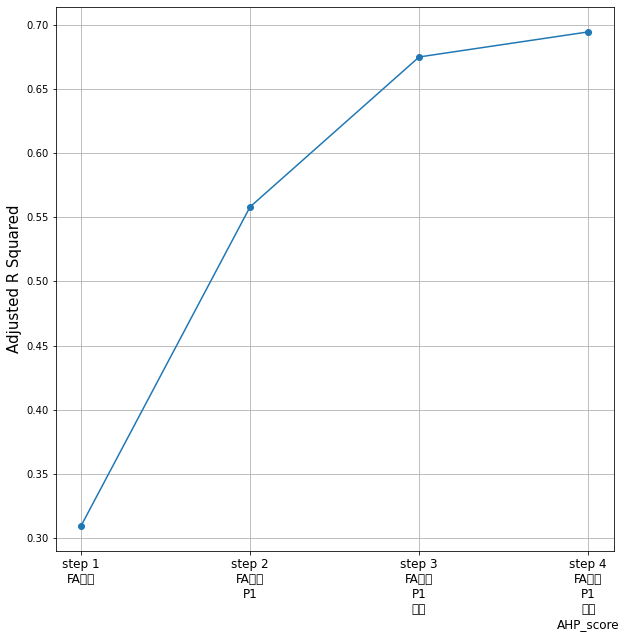

In [82]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 변수제거법

In [86]:
## 후진 소거법
variables = df.columns.tolist() ## 설명 변수 리스트
variables.remove('20연봉')

y = df['20연봉'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.30
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

In [87]:
selected_variables

['P1', 'AHP_score', '연차', 'FA유무', 'pos_weight']

C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52264 missing from cur

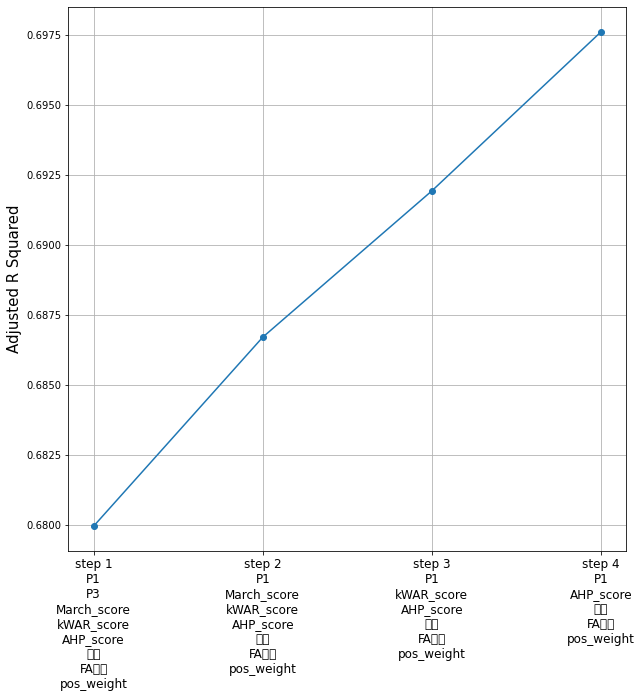

In [88]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 단계별 선택법

In [89]:
## 전진 단계별 선택법
variables = df.columns.tolist() ## 설명 변수 리스트
variables.remove('20연봉')
 
y = df['20연봉'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.15
sl_remove = 0.30
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-89-97e8f054f013>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsat

In [90]:
selected_variables

['FA유무', 'P1', '연차', 'AHP_score']

C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaij2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from cur

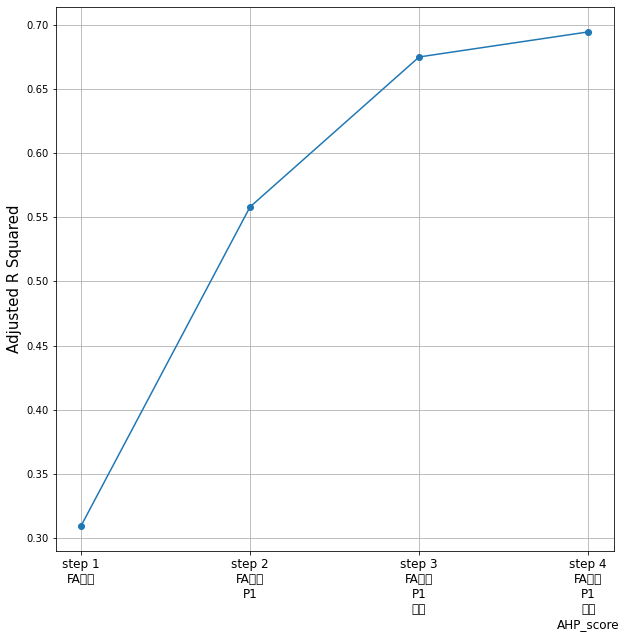

In [91]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## RFECV(Recursive Feature Elimination Cross Validation)
가장 feature importance가 낮은 feature들을 제거해가면서 각 feature 개수마다 모델의 성능을 계산
각 feature 개수별 성능을 평균내어 가장 높은 성능을 가지는 feature 개수에 해당하는 feature들을 최종 feature selection 결과로 사용

In [168]:
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight
Name,,,,,,,,,,
이정후,60.169202,-33.643572,29.752922,2884.098,290.201,50.647,3,10.571317,0,1
김하성,65.799497,-36.445377,43.253007,6602.337,785.830,206.309,6,10.915088,0,1
정은원,41.614203,-22.510505,23.910153,7027.212,702.721,145.229,2,9.392662,0,2
이천웅,47.175226,-25.918055,21.458005,3690.130,420.339,70.483,9,10.239960,0,0
최정,64.834202,-35.111436,30.251609,4409.072,661.361,136.681,15,11.695247,1,0
전준우,55.370307,-30.328578,30.495108,2318.764,232.726,41.806,12,10.819778,0,0
김현수,52.574475,-28.790556,24.451176,2080.985,166.400,34.539,14,11.775290,1,2
박해민,36.127665,-19.450843,20.258167,4025.088,456.506,76.802,8,10.308953,0,1
김재환,48.914708,-26.194889,23.431352,2020.000,202.000,36.360,12,11.082143,0,1


In [171]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = df_fin.drop(['20연봉', 'pos_weight'], axis = 1)
y = df_fin['20연봉']

names = pd.DataFrame(X.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFECV(lin_reg, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues = rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

,0
0,1
1,1
2,2
3,5
4,4
5,3
6,1
7,1


In [167]:
x

,P1,P2,연차,FA유무,pos_weight
Name,,,,,
이정후,60.169202,-33.643572,3,0,1
김하성,65.799497,-36.445377,6,0,1
정은원,41.614203,-22.510505,2,0,2
이천웅,47.175226,-25.918055,9,0,0
최정,64.834202,-35.111436,15,1,0
전준우,55.370307,-30.328578,12,0,0
김현수,52.574475,-28.790556,14,1,2
박해민,36.127665,-19.450843,8,0,1
김재환,48.914708,-26.194889,12,0,1


In [170]:
x = df_fin_2.drop(['P3', 'kWAR_score', 'March_score', 'AHP_score', '20연봉'], axis = 1)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.54402945 11.28826323  9.80682929 10.3526464  12.306558   11.06621258
 11.62457069  9.8213852  10.80316472 11.04651379 11.76915834 11.98289566
 11.49020179 10.45164416 10.46215129 10.71430039  9.41893914 10.24090431
 10.81351436 11.49038971 11.09490828 10.52954521 10.11931465  9.24562052
 10.33664484 10.10408379 10.05042539 11.20784414 10.07649324 10.03181493
 10.79735524  9.81029065 11.15494443 10.87635279 10.51824435 10.59583757
 10.50302741 10.84532634  9.74534174 11.08040334  9.43983419 10.16090565
  9.63716011 10.49217852 12.02935368 10.90508443  9.64913105 10.23791582
 10.25139112]
r2score =  0.7197045710682237
mse =  0.19419273713540508
rmse =  0.4406730501578297
adjustedr2 =  0.6796623669351128


In [174]:
x = df_fin.drop(['20연봉'], axis = 1)
y = df_fin['20연봉']

In [175]:
from sklearn.feature_selection import SelectKBest, f_classif

selectK = SelectKBest(score_func = f_classif, k=5)
ind = selectK.fit_transform(x, y)

In [178]:
x = pd.DataFrame(ind)
y = df_fin['20연봉']                    ## 로그 1번

LR = LinearRegression()
LR.fit(x, y)

y_prediction = LR.predict(x)
print(y_prediction)
print('r2score = ', r2_score(y, y_prediction))
print('mse = ', mean_squared_error(y,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y,y_prediction)))
## adjusted R2 score
r2 = r2_score(y, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.54027101 11.01908787  9.62480953 10.44571692 12.28702002 11.06494033
 11.56024427  9.83825123 10.83128992 11.10052133 11.92080474 12.08336012
 11.59941844 10.24798695 10.46865142 10.67895917  9.4598334  10.24211126
 10.80341525 11.57540616 11.15800876 10.55467429 10.18096354  9.52308752
 10.49522673 10.11596528 10.23113311 11.20939571  9.98446295 10.1605801
 10.7312224  10.06274677 11.3706379  10.8408907  10.40180012 10.61933091
 10.42222927 10.76739861  9.69610064 10.94127913  9.62601082  9.88761519
  9.83537768 10.46960625 11.7664201  10.87186933  9.51910063 10.11205801
 10.07375407]
r2score =  0.6972800834000092
mse =  0.20972874732203445
rmse =  0.4579615129266153
adjustedr2 =  0.6620800930976847


In [143]:
ind

array([[ 60.16920168, -33.64357186,  29.75292219,   3.        ,
          0.        ],
       [ 65.79949671, -36.44537748,  43.25300708,   6.        ,
          0.        ],
       [ 41.61420345, -22.51050529,  23.9101533 ,   2.        ,
          0.        ],
       [ 47.17522554, -25.91805496,  21.45800513,   9.        ,
          0.        ],
       [ 64.83420162, -35.11143595,  30.25160927,  15.        ,
          1.        ],
       [ 55.37030671, -30.32857798,  30.4951079 ,  12.        ,
          0.        ],
       [ 52.57447524, -28.79055609,  24.45117617,  14.        ,
          1.        ],
       [ 36.12766507, -19.45084326,  20.2581672 ,   8.        ,
          0.        ],
       [ 48.91470773, -26.19488922,  23.43135182,  12.        ,
          0.        ],
       [ 45.43030914, -24.84686602,  26.04698962,  13.        ,
          1.        ],
       [ 50.41026654, -27.64559735,  23.62676606,  20.        ,
          1.        ],
       [ 55.2881756 , -29.76274615,  22.411

In [124]:
x

,P1,P2,연차,FA유무,pos_weight
Name,,,,,
이정후,60.169202,-33.643572,3,0,1
김하성,65.799497,-36.445377,6,0,1
정은원,41.614203,-22.510505,2,0,2
이천웅,47.175226,-25.918055,9,0,0
최정,64.834202,-35.111436,15,1,0
전준우,55.370307,-30.328578,12,0,0
김현수,52.574475,-28.790556,14,1,2
박해민,36.127665,-19.450843,8,0,1
김재환,48.914708,-26.194889,12,0,1


In [125]:
y

Name
이정후    10.571317
김하성    10.915088
정은원     9.392662
이천웅    10.239960
최정     11.695247
전준우    10.819778
김현수    11.775290
박해민    10.308953
김재환    11.082143
손아섭    12.206073
유한준    10.819778
최형우    11.918391
이대호    12.429216
오지환    11.002100
이명기    10.085809
김상수    10.126631
박찬호     9.259131
허경민    10.778956
박건우    10.714418
박병호    12.206073
오재일    10.757903
박민우    10.858999
구자욱    10.239960
김민혁     9.104980
채은성    10.373491
정수빈    10.434116
고종욱     9.740969
황재균    11.695247
박세혁    10.051908
강백호     9.952278
이재원    11.775290
한동민    10.126631
김태균    10.819778
박경수    10.596635
서건창    10.463103
송광민    10.126631
이형종     9.903488
이성열    10.819778
김성현     9.952278
김재호    11.082143
이창진     9.047821
유강남    10.043249
김헌곤     9.852194
김강민    10.463103
양의지    12.206073
이원석    10.308953
오선진     9.259131
최재훈     9.903488
김선빈    10.714418
Name: 20연봉, dtype: float64

In [115]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = Saber.drop(['20연봉'], axis = 1)
y = Saber['20연봉']

names = pd.DataFrame(X.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFECV(lin_reg, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings


,0
0,1
1,1
2,1
3,1
4,3
5,5
6,1
7,1
8,7
9,2


In [114]:
X.columns

Index(['OBP', 'SLG', 'OPS', 'GPA', 'SECA', 'TA', 'RC', 'RC27', 'XR', 'ISO',
       'PSR', 'wOBA', 'BABIP', 'OW%'],
      dtype='object')

# Pearson Correlation

In [62]:
pearsonr(df_fin['P1'], df_fin['March_score'])

(0.21860363546421116, 0.025066473374933868)

In [61]:
df_fin

,P1,P2,P3,March_score,kWAR_score,AHP_score,연차,20연봉,FA유무,pos_weight
Name,,,,,,,,,,
이정후,60.560333,-27.374269,27.260961,2884.098,290.201,50.647,3,10.571317,0,0
김하성,67.295856,-30.662813,38.893541,6602.337,785.830,206.309,6,10.915088,0,1
정은원,42.115371,-18.860721,21.633669,7027.212,702.721,145.229,2,9.392662,0,1
이천웅,47.216744,-21.099528,19.750326,3690.130,420.339,70.483,9,10.239960,0,0
최정,64.901770,-28.726298,27.835213,4409.072,661.361,136.681,15,11.695247,1,1
...,...,...,...,...,...,...,...,...,...,...
이우성,9.012280,-2.814718,2.691278,552.936,56.394,10.041,7,8.294050,0,0
허일,9.075084,-3.139527,3.308495,465.352,46.765,8.300,9,8.318742,0,0
김찬형,10.028579,-3.499849,3.684778,2494.480,286.502,77.129,4,8.665613,0,1
